# Fonction de convolution au noyau

On pose : $$\bar \Psi = L_b \cdot \Psi$$

$$\Psi : v \mapsto \mathcal{K} * v$$

En définissant le noyau $\mathcal{K}$ par sa transformée de Fourier :

$$\mathcal{F}(\mathcal{K}) : k \mapsto |k| \frac{1+e^{\frac{-4}{|k|H}}}{1-e^{\frac{-4}{|k|H}}} = \frac{|k|}{\tanh(\frac{2}{|k|H})} $$

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

##Paramètres
mu = 30e9
sigma = 100e6
rho = 2400
a = 2e-3
b = 1e-3
v0 = 1e-9
dc = 1e-3
eta = np.sqrt(mu*rho/2) #=6000000
Lb = mu*dc/(b*sigma) #=300
deltaX = int(Lb/30) 
I = 128
L = I * deltaX
H = 2*L

def noyau(freq,H) :
    pos = freq==0 #on localise la position des zéros
    freq[pos] = 1 #On remplace les zéros par des non-zéros (1 par exemple)
    c = np.abs(freq)
    freq = c/np.tanh(2/H/c) #on applique l'opération (sans rencontrer de zéros donc)
    freq[pos] = 0 #on met des zéros aux positions des zéros du tableau de départ
    return freq

def Psi(f, deltaX, H) :
    F=np.fft.fft(f)
    freq=np.fft.fftfreq(len(f),deltaX)
    K = noyau(freq, H)

    F=K*2*np.pi*F

    psi=np.fft.ifft(F)
    return psi.real*Lb

def hilbert_grad(f, deltaX) :
    F=np.fft.fft(f)
    k=np.fft.fftfreq(len(f),deltaX)

    F=np.abs(k*2*np.pi)*F

    hh=np.fft.ifft(F)
    return hh.real*Lb

In [103]:
##Conditions initiales
x = np.arange(-L//2, L//2 + 1, deltaX)
d = L//5 #largeur de la zone de glissemnt initiale
amp = 10 #amplitude max

#Elliptique
Ae = []
for y in x :
    if y < d and y > -d:
        Ae.append((np.sqrt(d**2 - y**2)/d)*amp + 1)
    else :
        Ae.append(1) 
Ae = np.array(Ae)

#Gaussienne
Ag = np.exp(-x**2/(d**2))*amp + np.ones(I+1)

#Carré
Ac = []
for y in x :
    if y < d and y > -d:
        Ac.append(amp)
    else :
        Ac.append(1)
Ac = np.array(Ac)

#Uniformes
Au = np.ones(I+1)*amp

##Calcul
CI = Ac
G = Psi(CI, deltaX, H)
J = hilbert_grad(CI, deltaX)

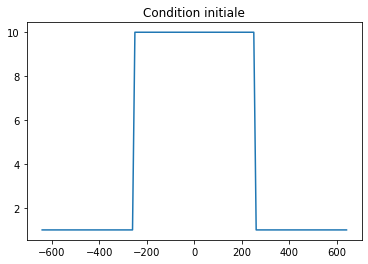

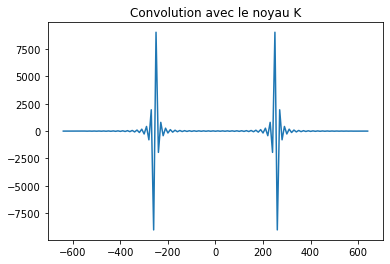

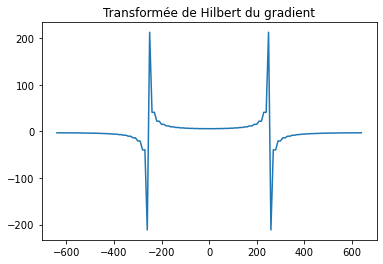

In [104]:
plt.plot(x, CI)
plt.title('Condition initiale')
plt.show()
plt.plot(x, G)
plt.title('Convolution avec le noyau K')
plt.show()
plt.plot(x, J)
plt.title('Transformée de Hilbert du gradient')
plt.show()